# <span style="color:cyan"> Prueba 2
## Rodrigo Sepúlveda

### <span style="color:#87CEEB"> El enunciado debe estar clarificado, considerando el tipo de problema a resolver. Se deben considerar las librerías a implementar.

    La base de datos con que se trabajará este proyecto contiene información sobre interrogaciones y detenciones realizadas por el departamento de policía de NY en la vía pública.
    Los datos recopilados pertenecientes al año 2009 corresponden al conjunto de entrenamiento, mientras que los datos del año 2010 al conjunto de pruebas. Estos registros son un muestreo de la totalidad debido al gran volumen de datos y los tiempos asociados al entrenamiento y procesamiento de estos mismos.
    De acuerdo a lo requerido, se ocuparon 2 vectores objetivos para los modelos utilizados. Uno de ellos fue 'arstmade' y el otro fue creado a partir de atributos que indicaban si hubo violencia o no.

    Los modelos implementados correspondieron a problemas de clasificación ya que ambos vectores objetivos presentan variables binarias.

In [2]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Modelación
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Otros
import pickle
from preproc_nyc_sqf import infer_datatype, return_time_string, count_freq, create_suitable_dataframe
#import warnings
#warnings.filterwarnings("ignore")

    Las librerías se obtuvieron desde 'conda list'
    
    # Name                    Version                   Build
    matplotlib                3.7.1            py39haa95532_1 
    numpy                     1.23.5           py39h3b20f71_0  
    pandas                    1.5.3            py39hf11a4ad_0
    pickleshare               0.7.5           pyhd3eb1b0_1003 
    scikit-learn              1.2.2            py39hd77b12b_0
    scipy                     1.10.1           py39h321e85e_0
    seaborn                   0.12.2           py39haa95532_0
    statsmodels               0.13.5           py39h080aedc_1 

### <span style="color:#87CEEB"> El tipo de métricas a implementar
    
    Las métricas que se utilizan en los problemas de clasificación tienen que ver con la calidad de la predicción. Para determinar esto, se utilizan las siguientes métricas:

        - Precision: mide la proporción de verdaderos positivos entre todos los resultados positivos predichos.

        - Recall: mide la proporción de verdaderos positivos entre todos los resultados positivos reales.

        - F1-Score: combina la precisión y recall en una sola métrica, es una media armónica entre ambas.

        - Accuracy: mide la proporción de predicciones correctas en comparación con el total de predicciones.

        - Curva ROC: mide la capacidad del modelo para distinguir entre las clases positivas y negativas. Se utiliza para comparar el rendimiento de diferentes modelos de clasificación.

### <span style="color:#87CEEB"> ¿Qué estrategia de división de muestras?

    En este proyecto, no se utilizó la tradicional división de muestras (train_test_split) debido a que las bases de datos proporcionadas correspondían al conjunto de entrenamiento para el año 2009 y conjunto de pruebas para el año 2010. A partir de estos se dividieron las matrices y vectores objetivos correspondientes.

### <span style="color:#87CEEB"> ¿Qué tipo de preprocesamiento se implementará?

    Para los atributos, se va a verificar la presencia de datos nulos o valores que no entreguen información. A partir de esto, se analizarán aquellas columnas que presenten un alto porcentaje de valores faltantes, y en base a ese valor se evaluará la opción de eliminar o recodificar dichas columnas.

    También se estudiarán de manera individual los atributos a partir de lo observado y la información entregada en el diccionario externo. Esto podría llevar a la eliminación de atributos que entreguen información reduntante o irrelevante.
    
    Posteriori a la limpieza de datos, se identificarán las variables categóricas y recodificarán con binary encoding. Una vez hecho esto, se separarán las muestras de entrenamiento y validación y se procederá a implementar los modelos.

### <span style="color:#87CEEB"> Modelos a utilizar

    Se implementarán distintos modelos para cada objetivo.
    Para el ejercicio en que se solicita predecir si un determinado procedimiento concluirá en arresto o no, los modelos a utilizar son:
    - Logistic Regression
    - Decision Tree Classifier
    - Bernoulli (Naive Bayes)

    Para el ejercicio en que se solicita predecir si el procedimiento policical concluirá en algunan acción violenta, los modelos a utilizar son:
    - Random Forest
    - Support Vector Machine
    - Gradient Boosting
    - Linear Discriminant Analysis
    - Voting Classifier

    Para ambos ejercicios, el primer modelo será uno base o por defecto, luego en la segunda iteración se implementará una búsqueda por grilla. Y en la tercera iteración se depurará la grilla con el fin de mejorar el desempeño del modelo.

## <span style="color:orange"> Análisis vector objetivo

### <span style="color:#87CEEB"> Se debe analizar el comportamiento del vector objetivo.

In [3]:
# carga de datos
df_train = pd.read_csv('2009_1perc.csv').drop('Unnamed: 0', axis=1)
df_test = pd.read_csv('2010_1perc.csv').drop('Unnamed: 0', axis=1)

In [4]:
print(df_train.shape)
print(df_test.shape)

(5812, 111)
(6013, 111)


In [5]:
# valores unicos
print(f'df_train:\n',df_train['arstmade'].unique(),'\n','-'*12)
print(f'df_test:\n',df_test['arstmade'].unique())

df_train:
 ['N' 'Y'] 
 ------------
df_test:
 ['N' 'Y']


    El vector objetivo presenta dos clases.

In [6]:
# cantidad de clases en vector objetivo
print(f'df_train:\n',df_train['arstmade'].value_counts(),'\n','-'*30)
print(f'df_test:\n',df_test['arstmade'].value_counts())

df_train:
 N    5464
Y     348
Name: arstmade, dtype: int64 
 ------------------------------
df_test:
 N    5613
Y     400
Name: arstmade, dtype: int64


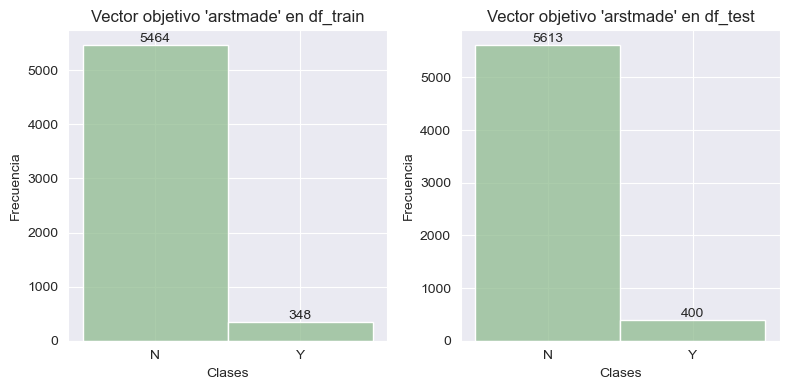

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
data = [df_train['arstmade'], df_test['arstmade']]
titles = ["Vector objetivo 'arstmade' en df_train", "Vector objetivo 'arstmade' en df_test"]
for i in range(2):
    sns.histplot(data[i], color='darkseagreen', ax=axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Clases')
    axs[i].set_ylabel('Frecuencia')
    for j in axs[i].containers:
        axs[i].bar_label(j, label_type='edge')
fig.tight_layout()
plt.show()

    Se observa un claro desbalance entre las clases, en donde la mayoritaria corresponde a 'No'. Esta etiqueta indica que no se realizó un arresto.

### <span style="color:#87CEEB"> Se debe reportar el patrón de datos perdidos.

In [8]:
# cantidad de datos nulos en vector objetivo
print(f'df_train:\n',df_train['arstmade'].isna().value_counts(),'\n','-'*30)
print(f'df_test:\n',df_test['arstmade'].isna().value_counts())

df_train:
 False    5812
Name: arstmade, dtype: int64 
 ------------------------------
df_test:
 False    6013
Name: arstmade, dtype: int64


In [33]:
print(df_train['arstmade'].shape)
print(df_test['arstmade'].shape)

(5812,)
(6013,)


    El vector objetivo no presenta datos nulos en los datos de entrenamiento y validación.

## <span style="color:orange"> Análisis atributos

### <span style="color:#87CEEB"> Análisis exploratorio de atributos

In [34]:
display(df_train.head()) 
display(df_test.head())

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20


In [35]:
# presencia de datos nulos en ambos dataset
print((df_train.isnull().sum()).to_list())
print((df_test.isnull().sum()).to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


    En primera instancia al analizar automáticamente la presencia de datos nulos en las muestras de entrenamiento y validación se observa que solamente se reportan solo 2 datos nulos en el dataset de validación. Sin embargo, en la casilla superior se observa que existen datos 'vacíos' (distinto de nulos) en ambas base de datos y que el método .isnull() no los reconoce. 


    Para poder analizar la cantidad de datos nulos, a continuación se realizará una recodificación de los valores que correspondan a espacios vacíos (' ') a nulos para poder identificarlos y tener un registro de estos. En caso que existan columnas que en su totalidad tengan datos nulos, estas se eliminarán del dataset ya que no aportan información. Esto se realizará tanto para los datos de entrenamiento y validación con el fin que la cantidad de columnas sea la misma.
    
    También se evaluarán las columnas que tengan más del 80% de datos nulos, y se observará que información proporcionan para evaluar o no su eliminación de la base de datos.

In [36]:
# recodificación de vacíos
df_train = df_train.replace({' ': np.nan})
df_test = df_test.replace({' ': np.nan})

In [37]:
# comprobación de recodificación correcta
print((df_train.isnull().sum()).to_list())
print((df_test.isnull().sum()).to_list())

[0, 0, 0, 0, 0, 0, 0, 205, 0, 0, 0, 0, 0, 0, 0, 5464, 0, 5456, 0, 0, 0, 5727, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4559, 4205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5812, 0, 5812, 5812, 591, 3300, 3225, 40, 40, 5812, 0, 5812, 5812, 0, 116, 3622, 5268, 168, 168, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5614, 0, 5567, 0, 0, 0, 5937, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4687, 4370, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6013, 1, 6013, 6013, 625, 3561, 3468, 71, 70, 6013, 1, 6013, 6013, 1, 173, 3822, 5383, 249, 249, 1, 1, 1]


    Luego de la recodificación ahora sí se observan datos nulos

In [38]:
null_data_train = df_train.isna().mean().sort_values(ascending=False)*100
null_data_test = df_test.isna().mean().sort_values(ascending=False)*100

In [39]:
null_data_train  = null_data_train[null_data_train > 80].round(3)
null_data_test  = null_data_test[null_data_test > 80].round(3)

In [171]:
# Listado de datos nulos en las columnas
display(null_data_train)
display(null_data_test)

aptnum      100.000
othfeatr    100.000
rescode     100.000
premtype    100.000
zip         100.000
state       100.000
officrid     98.538
arstoffn     94.012
sumoffen     93.875
post         90.640
dtype: float64

state       100.000
othfeatr    100.000
rescode     100.000
aptnum      100.000
premtype    100.000
zip         100.000
officrid     98.736
arstoffn     93.364
sumoffen     92.583
post         89.523
dtype: float64

    Se obtuvieron 6 atributos en que todas sus filas contienen nulos. Se procederá a eliminarlos.
    En ambos casos se repiten las variables por lo que ambos dataframes quedan igualadas respecto a la cantidad de columnas.

    Para las demás variables que presentaron un porcentaje de nulos igual o sobre el 80% se indicará el motivo del por qué se eliminaránn de las bases de datos (train y test):
    - officrid: No se considera relevante que el policia muestre su ID.
    - arstoffn: Al observar las clases que tiene esta variable no es factible su recodificación.
    - sumoffen: Al observar las clases que tiene esta variable no es factible su recodificación.
    - post: Al observar las clases que tiene esta variable no es factible su recodificación.

    Ante el desconocimiento de a qué corresponden los resultados de algunas variables, lo ideal sería contactar a personal calificado para pedir asesoramiento y poder evaluar de mejor manera los atributos.

In [41]:
df_train = df_train.drop(null_data_train.index, axis=1)
df_test = df_test.drop(null_data_test.index, axis=1)

In [42]:
print(df_train.shape)
print(df_test.shape)

(5812, 101)
(6013, 101)


    Con la eliminación de las variables sobre el 80% de datos nulos, los dataframes quedaron con 101 atributos.

    Adicionalmente, se estudiaron las demás variables y se tomó la decisión de eliminar algunas que se consideraron poco relevantes o que existe otra variable que entrega información similar.
    La siguiente lista muestra aquellas variables seleccionadas para eliminarlas.

In [43]:
lista_eliminados = ['year', 'compyear', 'adtlrept', 'machgun', 'revcmd', 'dob', 'addrtyp', 'addrnum', 'addrpct', 'xcoord', 'ycoord', 'dettypcm', 'linecm']

In [44]:
df_train.shape

(5812, 101)

In [45]:
# se procede a eliminar los atributos en ambos dataframes 
df_train = df_train.drop (lista_eliminados, axis = 1)
df_test = df_test.drop (lista_eliminados, axis = 1)
display(df_train)
display(df_test)

,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,...,eyecolor,build,premname,stname,stinter,crossst,city,sector,beat,detailcm
0,41,1779,4032009,130,A,O,P,1.0,CPW,2,...,BR,M,STREET,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,BRONX,G,7,20
1,108,5805,10292009,1050,A,O,P,3.0,BURG,5,...,BR,T,STREET,NaN,63 STREET,37 AVENUE,QUEENS,J,NaN,14
2,43,8340,10062009,1450,1,O,P,1.0,MISD,1,...,BR,M,STREET,NaN,WATSON AVENUE,WHEELER AVENUE,BRONX,E,NaN,20
3,77,932,1232009,1843,A,O,P,5.0,MIS,5,...,BR,T,STREET,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,BROOKLYN,J,4,24
4,110,11224,12132009,1655,A,O,P,3.0,CPW,10,...,BR,M,SIDEWALK,NaN,53 AVENUE,108 STREET,QUEENS,H,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,52,3719,3282009,210,A,O,P,1.0,ASSAULT,1,...,BR,M,STREET,NaN,HEATH AVENUE,BAILEY AVENUE,BRONX,A,NaN,9
5808,79,15751,9292009,2008,A,O,P,3.0,CPW,2,...,BR,T,PUBLIC STREET,NaN,VERNON AVENUE,LEWIS AVENUE,BROOKLYN,F,17,20
5809,69,3024,6262009,1937,1,O,P,1.0,FEL,2,...,BR,M,STREET,NaN,FLATLANDS AVENUE,EAST 102 STREET,BROOKLYN,B,NaN,85
5810,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,5,...,BR,T,NYCHA,BUSH STREET,COLUMBIA STREET,DWIGHT STREET,BROOKLYN,A,10,27


,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,...,eyecolor,build,premname,stname,stinter,crossst,city,sector,beat,detailcm
0,6,487,1192010,1420,1,O,P,2,FEL,5,...,GR,T,SIDEWALK,8 AVENUE,WEST 14 STREET,GREENWICH AVENUE,MANHATTAN,G,NaN,85
1,42,7138,9042010,225,1,I,T,10,FELONY,2,...,BR,M,MEZZANINE,NaN,SOUTHERN BOULEVARD,FREEMAN STREET,BRONX,E,NaN,45
2,33,2628,6302010,1240,1,I,T,5,ROBBERY,4,...,BR,M,CLOSE-END AND MVM,NaN,BROADWAY,WEST 168 STREET,MANHATTAN,B,6,85
3,108,6384,11172010,2338,1,O,P,3,CSCS,5,...,BR,M,COURTYARD,65 STREET,37 AVENUE,BROADWAY,QUEENS,J,NaN,28
4,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,7,...,BR,T,PLAT,NaN,WEST 34 STREET,AVENUE OF THE AMERI,MANHATTAN,C,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,60,7062,9262010,45,1,O,H,2,MISD,2,...,BR,T,NYCHA,WEST 11 STREE,AVENUE X,AVENUE V,BROOKLYN,I,NaN,20
6009,75,15797,7302010,10,A,O,P,1,ROBBERY,1,...,BR,M,STREET,NaN,PENNSYLVANIA AVENUE,FULTON STREET,BROOKLYN,A,NaN,85
6010,123,830,4302010,1630,A,O,P,3,GLA,5,...,Z,M,STREET,NaN,ARDEN AVENUE,DRUMGOOLE ROAD WEST,STATEN IS,E,NaN,46
6011,115,13122,11232010,2100,1,O,P,1,FELONY,5,...,BR,M,SIDEWALK,NaN,NORTHERN BOULEVARD,77 STREET,QUEENS,E,NaN,85


In [46]:
print(df_train.shape)
print(df_test.shape)

(5812, 88)
(6013, 88)


In [47]:
lista_unk = ["premname", "sector", "offverb", "offshld", "stname", "stinter", "crossst", "beat", "city", "detailcm"]

for i in lista_unk:
    df_train[i] = df_train[i].fillna("UNKNOWN")
    df_test[i] = df_test[i].fillna("UNKNOWN")

    Se procede a cambiar los valores nulos de los atributos mencionados en la lista "lista_unk".
    En los atributos "offverb" y "offshld" debido a la cantidad de los datos nulos, se decidió no desbalancear artificialmente la clase.

In [48]:
df_test["city"].unique()

array(['MANHATTAN', 'BRONX', 'QUEENS', 'BROOKLYN', 'STATEN IS', 'UNKNOWN'],
      dtype=object)

In [49]:
# conversión de variables 'ht_feet' y 'ht_inch' a variable única 'meters'
def convert_to_meters(df):    
    meters = df['ht_feet'].astype(str) + '.' + df['ht_inch'].astype(str)
    df['meters'] = meters.apply(lambda x: float(x) * 0.3048)

convert_to_meters(df_train)
convert_to_meters(df_test)

# eliminación de variables 'ht_feet' y 'ht_inch'
df_train = df_train.drop(['ht_feet', 'ht_inch'], axis=1)
df_test = df_test.drop(['ht_feet', 'ht_inch'], axis=1)

In [50]:
# conversión de variable 'datestop' a 'month'
def convert_to_month(df):
    df['month'] = return_time_string(df['datestop']).apply(lambda x: x.month)

convert_to_month(df_train)
convert_to_month(df_test)

# eliminación de variable 'datestop' 
df_train = df_train.drop('datestop', axis=1)
df_test = df_test.drop('datestop', axis=1)

In [51]:
# imputación nulos variable 'trhsloc'
def imputar_trhsloc(df):
    moda = df['trhsloc'].mode()[0]
    # Imputar los valores faltantes con la moda
    df['trhsloc'] = df['trhsloc'].fillna(moda)
    # Ver el resultado
    df['trhsloc']

imputar_trhsloc(df_train)
imputar_trhsloc(df_test)

    En el diccionario de las variables entregadas con el enunciado de la prueba 2, aparece que la variable 'trhsloc' tiene 3 clases (P:'Neither', H:'Housing', T:'Transit'). Se asume que las variables anteriormente 'vacías' y que luego fueron transformadas a nulos corresponden a la clase 'Neither'.

In [52]:
# Distinción de tipos de datos en los atributos
print(f'df_train:\n',df_train.drop('arstmade', axis=1).dtypes.value_counts(),'\n','-'*30)
print(f'df_test:\n',df_test.drop('arstmade', axis=1).dtypes.value_counts())

df_train:
 object     74
int64      10
float64     2
dtype: int64 
 ------------------------------
df_test:
 object     75
int64      10
float64     1
dtype: int64


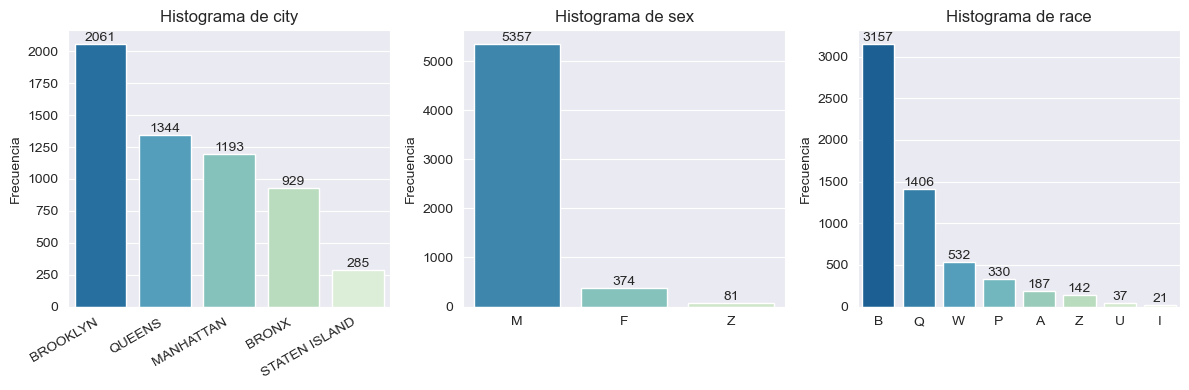

In [53]:
plt.figure(figsize=(12,4))
for index, col in enumerate(['city', 'sex', 'race']):
    plt.subplot(1, 3, index + 1)
    ax = sns.countplot(x=df_train[col], palette='GnBu_r', order=df_train[col].value_counts().index)
    plt.xlabel('')
    plt.ylabel("Frecuencia")
    plt.title(f'Histograma de {col}')
    if index == 0:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
plt.tight_layout()

## <span style="color:#87CEEB"> Reporte la probabilidad de que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza. Concluya, ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

In [54]:
# agrupar los datos y calcular la frecuencia relativa de arrestos en cada grupo
prob = df_train.groupby(['city', 'sex', 'race'])['arstmade'].value_counts('%').round(4)*100

df_prob = prob.unstack().fillna(0)
df_prob

arstmade                     N     Y
city          sex race              
BRONX         F   A     100.00  0.00
                  B      93.55  6.45
                  P     100.00  0.00
                  Q     100.00  0.00
                  W     100.00  0.00
...                        ...   ...
STATEN ISLAND M   P     100.00  0.00
                  Q      97.22  2.78
                  U     100.00  0.00
                  W      93.75  6.25
                  Z     100.00  0.00

[88 rows x 2 columns]

In [55]:
prob_bronx = df_prob.iloc[:19,:]
prob_brooklyn = df_prob.iloc[19:37,:]
prob_manhattan = df_prob.iloc[37:56,:]
prob_queens = df_prob.iloc[56:77,:]
prob_state_island = df_prob.iloc[77:,:]

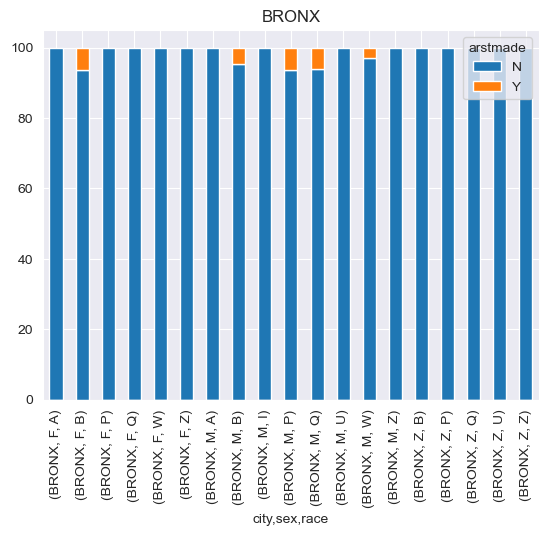

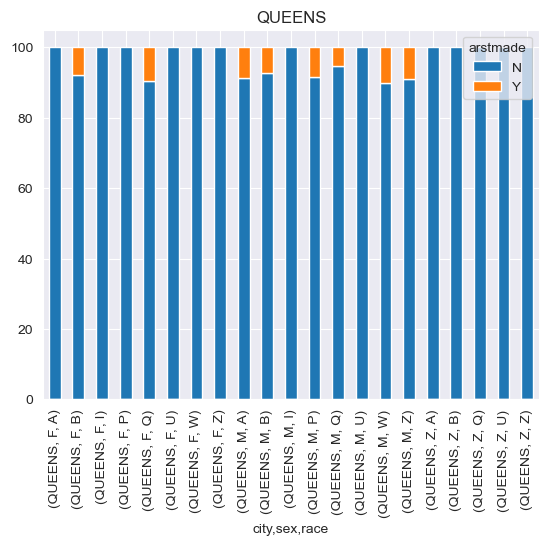

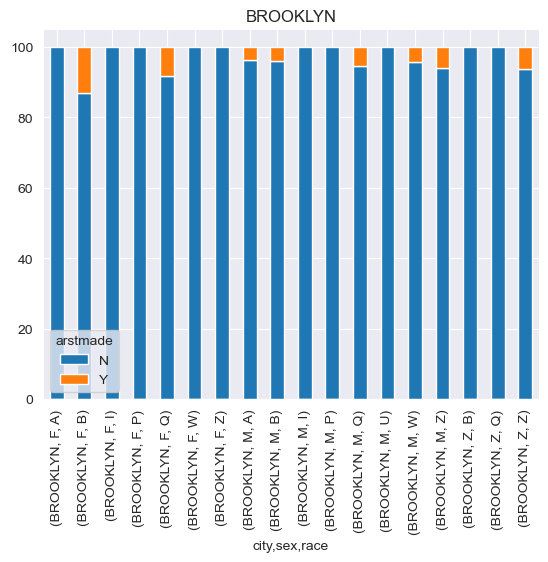

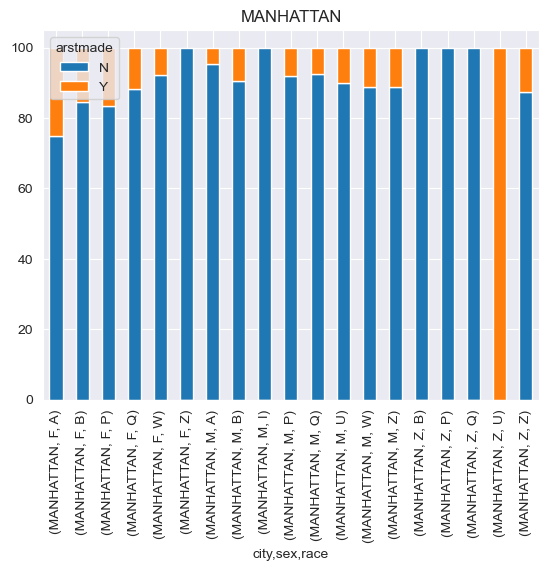

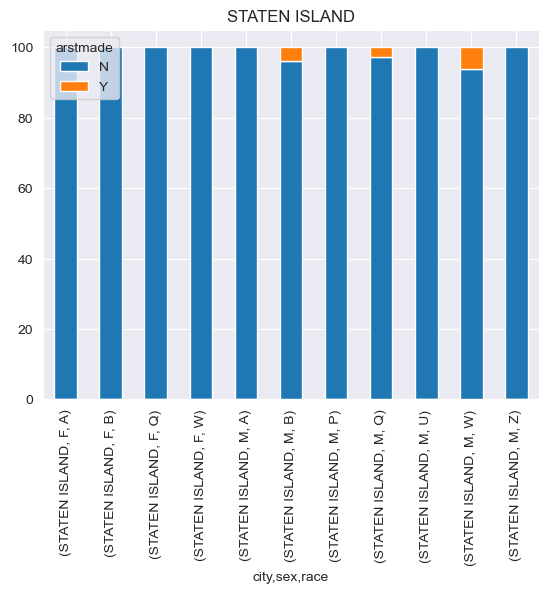

In [56]:
prob_list = [prob_bronx, prob_queens, prob_brooklyn, prob_manhattan, prob_state_island]
city_list = df_train.city.unique()

for idx, pr in enumerate(prob_list):
    pr.plot.bar(stacked=True)
    plt.title(city_list[idx])
    plt.show()

    Para el barrio Bronx, solo las mujeres de raza negra fueron arrestadas. En el caso de los hombres, fueron arrestados aquellos identificados como raza negra, blanco, hispánico negro e hispánico blanco.

    Para el barrio Queens, las mujeres de raza negra e hispánica blanca fueron arrestadas. En el caso de los hombres, fueron arrestados aquellos identificados como asiáticos, negros, blancos, hispánico blanco e hispánico negro y otro tipo de raza.

    Para el barrio Brooklyn, las mujeres de raza negra e hispánica blanca fueron arrestadas. En el caso de los hombres, fueron arrestados aquellos identificados como asiáticos, negros, blancos, hispánico blanco y otro tipo de raza. Para el género 'Z' se arrestaron otro tipo de raza.

    En el barrio de Manhattan se puede observar una mayor diversidad en cuanto a las razas que han sido arrestadas, ya que todas las razas de las mujeres, excepto "otras" han sido detenidas. Cabe señalar que las mujeres asiáticas presentaron el mayor porcentaje de arresto. En cuanto a los hombres ocurre lo mismo que en las mujeres, la única raza que no ha sido arrestada es indio americano/nativo de alaska. Para el género 'Z' se observa que el 100% de la raza 'U' fue arrestado.

    En el barrio de Staten Island se puede observar que ninguna mujer fue arrestada en el año 2009. En cuanto a los hombres, los arrestos fueron a aquellos de raza negra, blanca, hispánica negra e hispánica blanca.


    En conclusión se puede observar una clara tendencia de arrestos afectando a individuos de raza negra e hispánica, esto puede indicar que en la policía (NYPD) existe racismo y xenofobia.

## <span style="color:#87CEEB"> Entregue un modelo predictivo que prediga efectivamente si un determinado procedimiento concluirá en un arresto o no.

### <span style="color:orange"> Recodificación vector objetivo 'arstmade' en df_train y df_test

In [57]:
df_train['arstmade'] = df_train['arstmade'].replace({'Y': 1, 'N': 0})
df_test['arstmade'] = df_test['arstmade'].replace({'Y': 1, 'N': 0})

### <span style="color:orange"> Concatenación de dataframes

    Se observó una discrepancia en la variable 'detailcm'. Debido a esto se convirtió la variable 'detailcm' a str en el df_train, ya que a pesar que la variable contiene números, estos representan una categoría según lo mostrado en el diccionario de las variables.

In [58]:
# Convertir la columna 'detailcm' de int64 a str
df_train['detailcm'] = df_train['detailcm'].astype(str)

In [59]:
df_concat = pd.concat([df_train, df_test], axis=0)
df_concat

,pct,ser_num,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,...,premname,stname,stinter,crossst,city,sector,beat,detailcm,meters,month
0,41,1779,130,A,O,P,1.0,CPW,2,P,...,STREET,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,BRONX,G,7,20,1.798320,4
1,108,5805,1050,A,O,P,3.0,BURG,5,P,...,STREET,UNKNOWN,63 STREET,37 AVENUE,QUEENS,J,UNKNOWN,14,1.676400,10
2,43,8340,1450,1,O,P,1.0,MISD,1,V,...,STREET,UNKNOWN,WATSON AVENUE,WHEELER AVENUE,BRONX,E,UNKNOWN,20,1.920240,10
3,77,932,1843,A,O,P,5.0,MIS,5,P,...,STREET,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,BROOKLYN,J,4,24,1.676400,12
4,110,11224,1655,A,O,P,3.0,CPW,10,P,...,SIDEWALK,UNKNOWN,53 AVENUE,108 STREET,QUEENS,H,UNKNOWN,20,1.706880,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,60,7062,45,1,O,H,2.0,MISD,2,P,...,NYCHA,WEST 11 STREE,AVENUE X,AVENUE V,BROOKLYN,I,UNKNOWN,20,1.554480,9
6009,75,15797,10,A,O,P,1.0,ROBBERY,1,R,...,STREET,UNKNOWN,PENNSYLVANIA AVENUE,FULTON STREET,BROOKLYN,A,UNKNOWN,85,1.737360,7
6010,123,830,1630,A,O,P,3.0,GLA,5,P,...,STREET,UNKNOWN,ARDEN AVENUE,DRUMGOOLE ROAD WEST,STATEN IS,E,UNKNOWN,46,1.828800,4
6011,115,13122,2100,1,O,P,1.0,FELONY,5,P,...,SIDEWALK,UNKNOWN,NORTHERN BOULEVARD,77 STREET,QUEENS,E,UNKNOWN,85,1.557528,11


### <span style="color:orange"> Recodificación variables con binary encoding

In [60]:
lista_object = []
for i in df_concat.columns:
    if df_concat[i].dtype == "object":
        lista_object.append(i)
        df_concat = pd.concat([df_concat, pd.get_dummies (df_concat[i], drop_first=True, prefix=i)], axis=1)

df_concat = df_concat.drop(lista_object, axis=1).reset_index(drop=True)
df_concat

,pct,ser_num,timestop,perobs,perstop,arstmade,comppct,repcmd,age,weight,...,detailcm_87,detailcm_88,detailcm_9,detailcm_90,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98,detailcm_UNKNOWN
0,41,1779,130,1.0,2,0,0,41,24,145,...,0,0,0,0,0,0,0,0,0,0
1,108,5805,1050,3.0,5,0,0,108,15,140,...,0,0,0,0,0,0,0,0,0,0
2,43,8340,1450,1.0,1,0,0,43,21,220,...,0,0,0,0,0,0,0,0,0,0
3,77,932,1843,5.0,5,0,0,77,22,120,...,0,0,0,0,0,0,0,0,0,0
4,110,11224,1655,3.0,10,0,0,110,18,165,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,60,7062,45,2.0,2,0,0,801,20,150,...,0,0,0,0,0,0,0,0,0,0
11821,75,15797,10,1.0,1,0,0,75,23,180,...,0,0,0,0,0,0,0,0,0,0
11822,123,830,1630,3.0,5,0,0,123,1,200,...,0,0,0,0,0,0,0,0,0,0
11823,115,13122,2100,1.0,5,0,0,115,19,185,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_concat.isna().value_counts()

pct    ser_num  timestop  perobs  perstop  arstmade  comppct  repcmd  age    weight  meters  month  recstat_A  inout_O  trhsloc_P  trhsloc_T  crimsusp_,IS/CPW  crimsusp_10-10 NARCO SALE  crimsusp_10-30  crimsusp_140.15  crimsusp_220.03  crimsusp_220.39  crimsusp_220.39 / FEL  crimsusp_265.04 POSS OF DANG WEAPON  crimsusp_AGG HARR  crimsusp_AGG PANHANDELING  crimsusp_AGGRAVATED HARASSMENT  crimsusp_AGGRAVATED HARRASMENT  crimsusp_AGGRAVATED HARRASSMENT  crimsusp_ARSON  crimsusp_ASAULT  crimsusp_ASS  crimsusp_ASS2  crimsusp_ASSALUT  crimsusp_ASSAULT  crimsusp_ASSAULT 1  crimsusp_ASSAULT 2  crimsusp_ASSAULT 2 WITH FIREARM  crimsusp_ASSAULT 3  crimsusp_ASSAULT 3 DEGREE  crimsusp_ASSAULT 3 MISD  crimsusp_ASSAULT 3/CRIM MIS  crimsusp_ASSAULT GANG  crimsusp_ASSAULT/CPW  crimsusp_ASSLT  crimsusp_ASSUALT  crimsusp_ASSUALT MISD PSA#579  crimsusp_ASSULT  crimsusp_ATT GRAND LARCENY  crimsusp_ATT. ROBBERY  crimsusp_AUTO BREAKS  crimsusp_AUTO STRIP  crimsusp_AUTO STRIPPING  crimsusp_BUGLARY  crimsus

### <span style="color:orange"> Separación de df_concat en dataframe de entrenamiento y validación

In [62]:
df_train_dummies = df_concat.iloc[:5812,:]
df_test_dummies = df_concat.iloc[5812:,:].reset_index(drop=True)

In [63]:
df_train_dummies.head()

,pct,ser_num,timestop,perobs,perstop,arstmade,comppct,repcmd,age,weight,...,detailcm_87,detailcm_88,detailcm_9,detailcm_90,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98,detailcm_UNKNOWN
0,41,1779,130,1.0,2,0,0,41,24,145,...,0,0,0,0,0,0,0,0,0,0
1,108,5805,1050,3.0,5,0,0,108,15,140,...,0,0,0,0,0,0,0,0,0,0
2,43,8340,1450,1.0,1,0,0,43,21,220,...,0,0,0,0,0,0,0,0,0,0
3,77,932,1843,5.0,5,0,0,77,22,120,...,0,0,0,0,0,0,0,0,0,0
4,110,11224,1655,3.0,10,0,0,110,18,165,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_test_dummies.head()

,pct,ser_num,timestop,perobs,perstop,arstmade,comppct,repcmd,age,weight,...,detailcm_87,detailcm_88,detailcm_9,detailcm_90,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98,detailcm_UNKNOWN
0,6,487,1420,2.0,5,0,0,6,47,175,...,0,0,0,0,0,0,0,0,0,0
1,42,7138,225,10.0,2,0,0,873,19,175,...,0,0,0,0,0,0,0,0,0,0
2,33,2628,1240,5.0,4,0,0,862,45,200,...,0,0,0,0,0,0,0,0,0,0
3,108,6384,2338,3.0,5,0,0,108,22,210,...,0,0,0,0,0,0,0,0,0,0
4,14,2295,2240,5.0,7,0,0,850,43,170,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_train = df_train_dummies.drop('arstmade', axis=1)
y_train = df_train_dummies['arstmade']

X_test = df_test_dummies.drop('arstmade', axis=1)
y_test = df_test_dummies['arstmade']

    Modelo para disminuir la dimensionalidad, considerando los 30 atributos más importantes 

In [66]:
# primer modelo
from sklearn.tree import DecisionTreeClassifier

# modelo sin modificar hiperparámetros
dec_tree = DecisionTreeClassifier(random_state=94)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=94)

In [67]:
# métricas
yhat = dec_tree.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5613
           1       0.63      0.61      0.62       400

    accuracy                           0.95      6013
   macro avg       0.80      0.79      0.80      6013
weighted avg       0.95      0.95      0.95      6013



    Se observa que la clase 0 (no hubo arresto) presenta mejores métricas. Esto se debe a que el vector objetivo presenta un sesgo para esta clase.

In [68]:
def plot_importance(fit_model, feat_names, top_n=100):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1][:top_n]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(sort_importance)), tmp_importance[sort_importance])
    plt.yticks(range(len(sort_importance)), names, rotation=0)

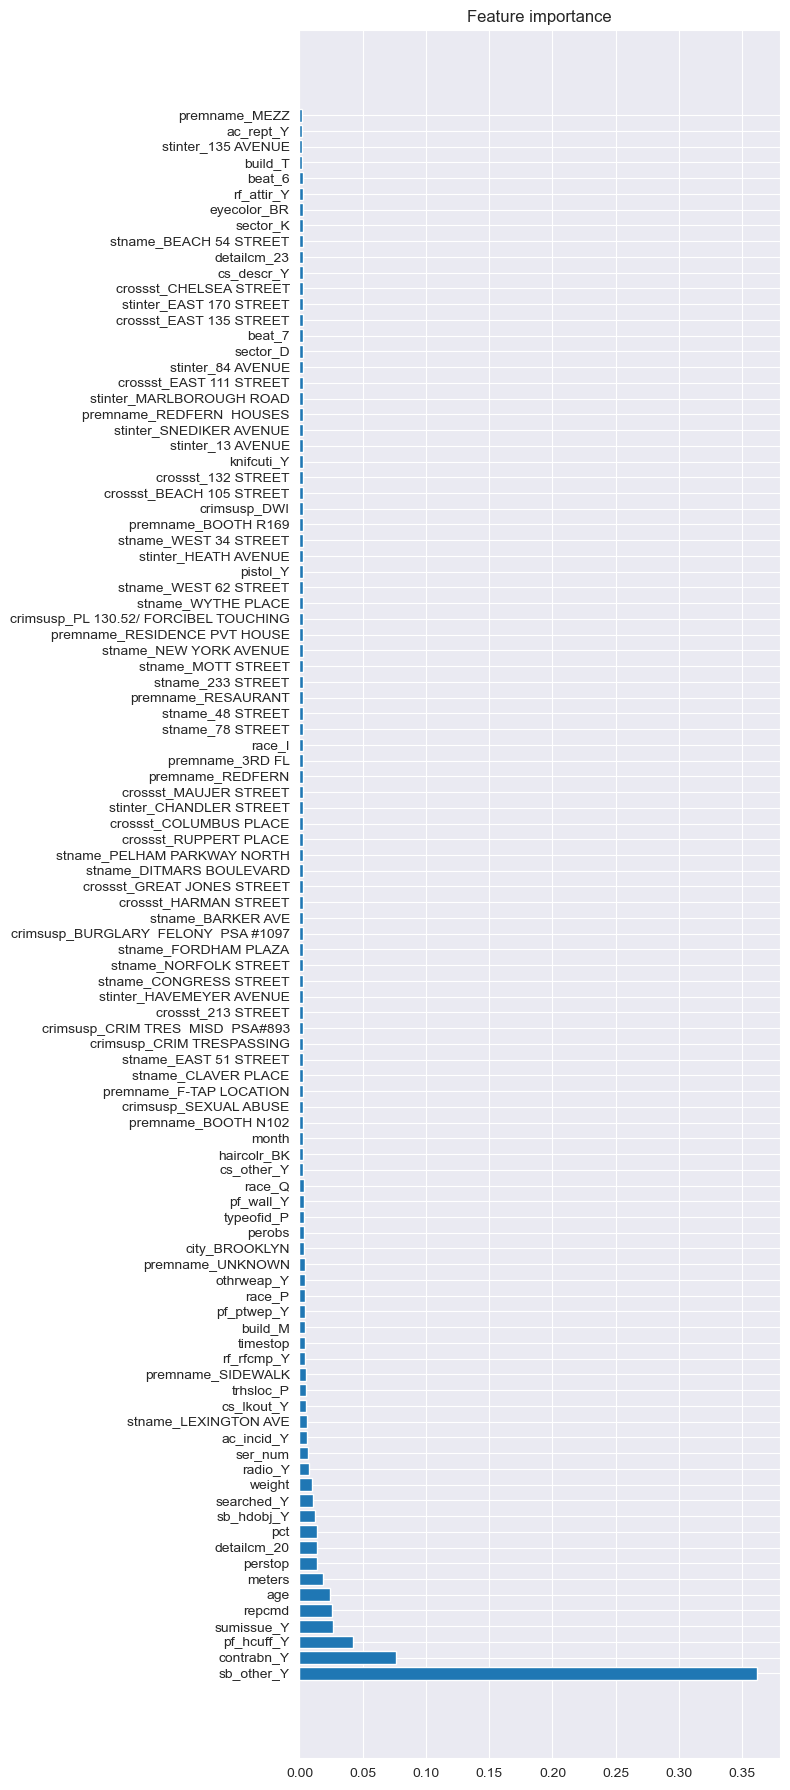

In [69]:
colnames = X_train.columns
plt.figure (figsize = (8,18))
plot_importance(dec_tree, colnames, top_n=100)
plt.tight_layout()

    Este gráfico muestra los 100 atributos más importantes con respecto al vector objetivo.

In [70]:
tmp_importance = dec_tree.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1][:100]
names = [X_train.columns[i] for i in sort_importance]
top_30_importance = names[:30]
top_30_importance

['sb_other_Y',
 'contrabn_Y',
 'pf_hcuff_Y',
 'sumissue_Y',
 'repcmd',
 'age',
 'meters',
 'perstop',
 'detailcm_20',
 'pct',
 'sb_hdobj_Y',
 'searched_Y',
 'weight',
 'radio_Y',
 'ser_num',
 'ac_incid_Y',
 'stname_LEXINGTON AVE',
 'cs_lkout_Y',
 'trhsloc_P',
 'premname_SIDEWALK',
 'rf_rfcmp_Y',
 'timestop',
 'build_M',
 'pf_ptwep_Y',
 'race_P',
 'othrweap_Y',
 'premname_UNKNOWN',
 'city_BROOKLYN',
 'perobs',
 'typeofid_P']

    Se seleccionaron los 30 atributos más importantes y se crearon nuevas matrices de entrenamiento y validación.

In [71]:
X_train_30 = X_train.loc[:,top_30_importance]
X_test_30 = X_test.loc[:,top_30_importance]

## Modelo LR

### 1era iteración

In [72]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=5000, random_state = 42)

In [73]:
model_lr.fit(X_train_30, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [74]:
yhat_lr = model_lr.predict(X_test_30)
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.83      0.57      0.67       400

    accuracy                           0.96      6013
   macro avg       0.90      0.78      0.83      6013
weighted avg       0.96      0.96      0.96      6013



### 2da iteracion

In [75]:
model_lr_2 = LogisticRegression (max_iter = 5000, random_state = 42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'saga']
}

model_lr_2_grid = GridSearchCV(model_lr_2, param_grid, cv=5, n_jobs=-1)

model_lr_2_grid.fit(X_train_30, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [76]:
model_lr_2_grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [77]:
yhat_lr_2 = model_lr_2_grid.predict(X_test_30)
print(classification_report(y_test, yhat_lr_2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.84      0.59      0.70       400

    accuracy                           0.97      6013
   macro avg       0.91      0.79      0.84      6013
weighted avg       0.96      0.97      0.96      6013



### 3era iteracion

In [78]:
model_lr_3 = LogisticRegression (max_iter = 5000, random_state = 42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100],
    'solver': ['liblinear', 'saga']
}

model_lr_3_grid = GridSearchCV(model_lr_3, param_grid, cv=5, n_jobs=-1)

model_lr_3_grid.fit(X_train_30, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [79]:
model_lr_3_grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
yhat_lr_3 = model_lr_3_grid.predict(X_test_30)
print(classification_report(y_test, yhat_lr_3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.80      0.60      0.69       400

    accuracy                           0.96      6013
   macro avg       0.88      0.80      0.83      6013
weighted avg       0.96      0.96      0.96      6013



## Modelo DecTree

### 1era iteración

In [81]:
model_dec = DecisionTreeClassifier (random_state = 42)

In [82]:
model_dec.fit(X_train_30, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
yhat_dec = model_dec.predict(X_test_30)
print(classification_report(y_test, yhat_dec))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5613
           1       0.52      0.60      0.56       400

    accuracy                           0.94      6013
   macro avg       0.75      0.78      0.76      6013
weighted avg       0.94      0.94      0.94      6013



### 2da iteración

In [84]:
model_dec_2 = DecisionTreeClassifier(random_state = 42)

params = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3]
}

model_dec_2_grid = GridSearchCV(model_dec_2, params, cv=5, n_jobs=-1)

model_dec_2_grid.fit(X_train_30, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]})

In [85]:
model_dec_2_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [86]:
yhat_dec_2 = model_dec_2_grid.predict(X_test_30)
print(classification_report(y_test, yhat_dec_2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.83      0.59      0.69       400

    accuracy                           0.96      6013
   macro avg       0.90      0.79      0.83      6013
weighted avg       0.96      0.96      0.96      6013



### 3era iteración

In [87]:
model_dec_3 = DecisionTreeClassifier(random_state = 42)

params = {
    "max_depth": [1, 2, 3],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [0.1, 0.5, 1]
}

model_dec_3_grid = GridSearchCV(model_dec_3, params, cv=5, n_jobs=-1)

model_dec_3_grid.fit(X_train_30, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [0.1, 0.5, 1],
                         'min_samples_split': [2, 3, 4]})

In [88]:
model_dec_3_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [89]:
yhat_dec_3 = model_dec_3_grid.predict(X_test_30)
print(classification_report(y_test, yhat_dec_3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.83      0.59      0.69       400

    accuracy                           0.96      6013
   macro avg       0.90      0.79      0.83      6013
weighted avg       0.96      0.96      0.96      6013



## Modelo BernoulliNB

### 1era iteración

In [90]:
from sklearn.naive_bayes import BernoulliNB

model_b = BernoulliNB()

In [91]:
model_b.fit(X_train_30, y_train)

BernoulliNB()

In [92]:
yhat_b = model_b.predict(X_test_30)
print(classification_report(y_test, yhat_b))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5613
           1       0.70      0.61      0.66       400

    accuracy                           0.96      6013
   macro avg       0.84      0.80      0.82      6013
weighted avg       0.95      0.96      0.96      6013



### 2da iteración

In [93]:
model_b_2 = BernoulliNB()

params = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.1, 0.5, 1.0]
}

model_b_2_grid = GridSearchCV (model_b_2, params, cv = 5, n_jobs = -1)

model_b_2_grid.fit (X_train_30, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0], 'binarize': [0.1, 0.5, 1.0]})

In [94]:
model_b_2_grid.best_params_

{'alpha': 0.1, 'binarize': 0.1}

In [95]:
yhat_b_2 = model_b_2_grid.predict(X_test_30)
print(classification_report(y_test, yhat_b_2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5613
           1       0.67      0.63      0.65       400

    accuracy                           0.96      6013
   macro avg       0.82      0.81      0.81      6013
weighted avg       0.95      0.96      0.95      6013



### 3era iteración

In [96]:
model_b_3 = BernoulliNB()

params = {
    'alpha': [0.001, 0.01, 0.1],
    'binarize': [0.001, 0.01, 0.1]
}

model_b_3_grid = GridSearchCV (model_b_3, params, cv = 5, n_jobs = -1)

model_b_3_grid.fit (X_train_30, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'binarize': [0.001, 0.01, 0.1]})

In [97]:
model_b_3_grid.best_params_

{'alpha': 0.1, 'binarize': 0.001}

In [98]:
yhat_b_3 = model_b_3_grid.predict(X_test_30)
print(classification_report(y_test, yhat_b_3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5613
           1       0.68      0.63      0.65       400

    accuracy                           0.96      6013
   macro avg       0.83      0.81      0.82      6013
weighted avg       0.95      0.96      0.95      6013



In [99]:
def print_roc_auc(model1, model2, model3 , X_test):
    """
    Imprime en un solo gráfico las curvas ROC (test) y los valores AUC (test) para los modelos.

    Parameters
    ----------
    model1: variable
            modelo ajustado de Gradient Boosting Classifier
    model2: variable
            modelo ajustado de Decision Tree Classifier
    model3: variable
            modelo ajustado de Linear Discriminant Analysis
    X_test: variable
            matriz de datos de validación

    Return
        None
    """
    # Valores de probabilidad para cada modelo
    models = [model1, model2, model3]
    y_hats = [model.predict_proba(X_test)[:, 1] for model in models]

    model_names = ['Logistic Regression', 'Decision Tree', 'Bernoulli Naive Bayes']
    fprs, tprs, labels, auc_scores = [], [], [], []

    for i, y_hat in enumerate(y_hats):
        fpr, tpr, _ = roc_curve(y_test, y_hat)
        fprs.append(fpr)
        tprs.append(tpr)
        labels.append(model_names[i])
        auc_scores.append(round(roc_auc_score(y_test, y_hat), 4))

    # Curvas ROC de cada modelo
    plt.figure(figsize=(10, 8))
    for i in range(len(models)):
        plt.plot(fprs[i], tprs[i], lw=1, label=f"{labels[i]} (AUC={auc_scores[i]})")
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=2), plt.plot([1, 1] , c='limegreen', lw=2)
    plt.xlabel('Falsos Positivos', fontsize=11)
    plt.ylabel('Verdaderos Positivos', fontsize=11)
    plt.title('Curvas ROC de modelos')
    plt.legend()
    plt.show()

In [100]:
def plot_classification_report(y_true, y_hat):
    """
    plot_classification_report: Genera una visualización de los puntajes reportados con la función `sklearn.metrics.classification_report`.

    Parámetros de ingreso:
        - y_true: Un vector objetivo de validación.
        - y_hat: Un vector objetivo estimado en función a la matriz de atributos de validación y un modelo entrenado.

    Retorno:
        - Un gráfico generado con matplotlib.pyplot

    """
    # process string and store in a list
    f1_score_value_0 = f1_score(y_true=y_true, y_pred=y_hat, pos_label=0)
    precision_score_value_0 = precision_score(y_true=y_true, y_pred=y_hat, pos_label=0)
    recall_score_value_0 = recall_score(y_true=y_true, y_pred=y_hat, pos_label=0)

    f1_score_value_1 = f1_score(y_true=y_true, y_pred=y_hat, pos_label=1)
    precision_score_value_1 = precision_score(y_true=y_true, y_pred=y_hat, pos_label=1)
    recall_score_value_1 = recall_score(y_true=y_true, y_pred=y_hat, pos_label=1)

    f1_score_value_avg = np.mean([f1_score_value_0, f1_score_value_1])
    precision_score_value_avg = np.mean([precision_score_value_0, precision_score_value_1])
    recall_score_value_avg = np.mean([recall_score_value_0, recall_score_value_1])

    colors = ['dodgerblue', 'tomato', 'purple', 'orange']

    plt.yticks([1.0, 2.0, 3.0], ['Precision', 'Recall', 'f1'])
    plt.xlim(0, 1)

    plt.plot(precision_score_value_0, [1], marker='x', color=colors[0])
    plt.plot(recall_score_value_0, [2], marker='x',color=colors[0], label=f'Class: {0}')
    plt.plot(f1_score_value_0, [3], marker='x', color=colors[0])

    plt.plot(precision_score_value_1, [1], marker='x', color=colors[1])
    plt.plot(recall_score_value_1, [2], marker='x',color=colors[1], label=f'Class: {1}')
    plt.plot(f1_score_value_1, [3], marker='x', color=colors[1])

    plt.plot(precision_score_value_avg, [1], marker='o', color='forestgreen')
    plt.plot(recall_score_value_avg, [2], marker='o', color='forestgreen', label='Avg')
    plt.plot(f1_score_value_avg, [3], marker='o', color='forestgreen')

    plt.axvline(.5, label = '.5 Boundary', linestyle='--', color='red')
    plt.legend(loc='center left', bbox_to_anchor=(1, .5))


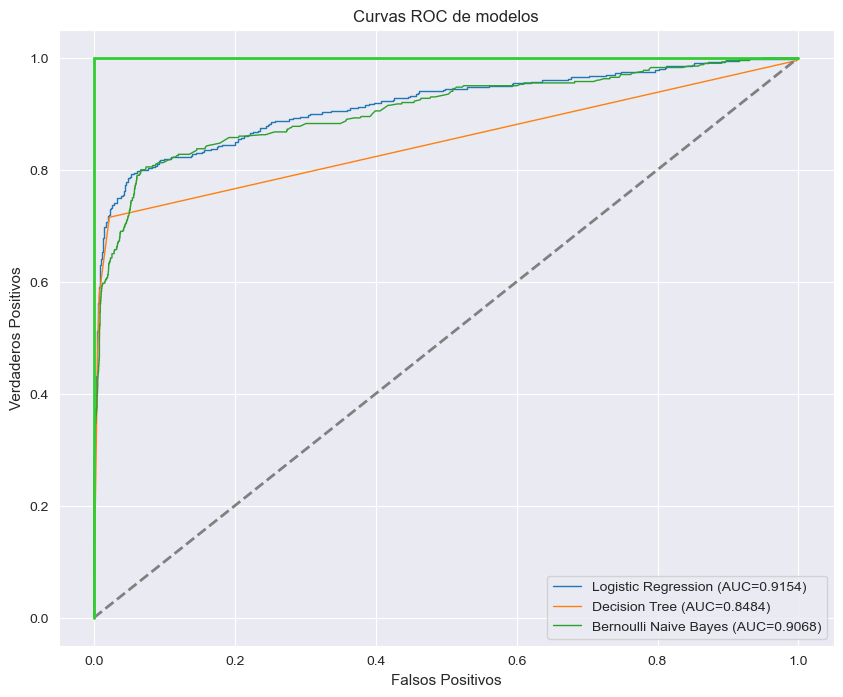

In [173]:
print_roc_auc(model1=model_lr_2_grid, model2=model_dec_3_grid, model3=model_b_3_grid, X_test=X_test_30)

    - Se entrenaron tres modelos predictivos para predecir si se producirá un arresto o no. Estos modelos son Logistic Regression, Decision Tree y BernoulliNB. En cada uno de estos se realizaron tres iteraciones en los cuales todas las métricas obtenidas fueron superiores a un clasificador aleatorio. Dichas iteraciones consistieron en mejorar la búsqueda de grilla con valores más acotados.
    - De estos tres tipos de modelos, el que arrojó mejores métricas, aunque muy leves, fue el logistic regression en la iteración 2, seguido de BernoulliNB en su iteración 3.

## <span style="color:orange"> Mejores 2 modelos

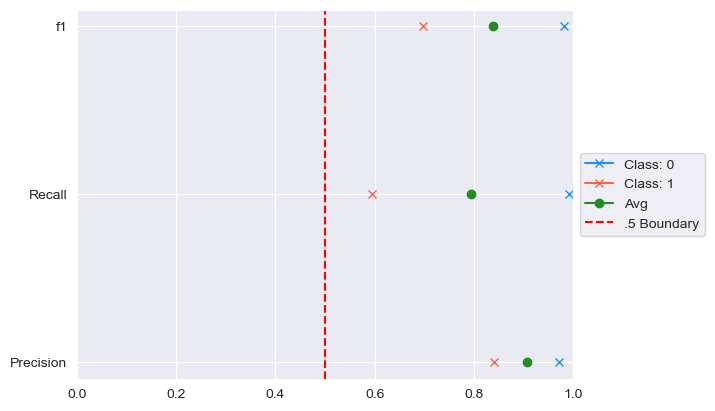

In [102]:
# logistic regression v2
plot_classification_report(y_test, yhat_lr_2)

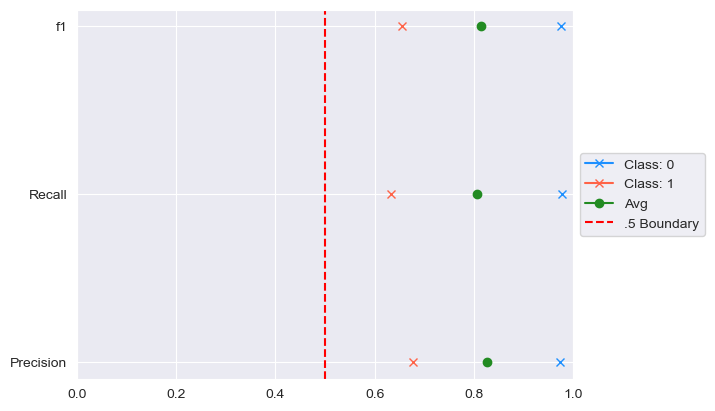

In [103]:
#BernoulliNB v3
plot_classification_report(y_test, yhat_b_3)

## <span style="color:orange"> Archivo serializado

In [174]:
# import pickle
pickle.dump((# top 2, modelos ajustados
            model_lr_2_grid,
            model_b_3_grid),
            open('rodrigo_sepulveda_modelos_pregunta_3.sav', 'wb'))

## <span style="color:#87CEEB"> Genere al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta.

    A continuación se listan las 13 variables que a nuestro criterio se deben incluir para generar el nuevo vector objetivo.
    Las siguientes variables se escogieron debido a que su descripción indica que el oficial tuvo que utilizar fuerza física.
    - pf_hands
    - pf_wall
    - pf_grnd
    - pf_drwep
    - pf_ptwep
    - pf_baton
    - pf_hcuff
    - pf_pepsp
    - pf_other

    Las restantes 4 variables se escogieron según lo detallado a continuación:
    - rf_vcrim: el individuo es sospechoso de crimen violento
    - rf_attir: individuo sospechoso es visto con atuendos no apropiados para la temporada, por ejemplo, se viste con ropa abrigada para ocultar algún arma en pleno verano.
    - cs_lkout: el individuo es sospechoso actuando como vigilante
    - rf_vcact: el individuo es encontrado tomando parte de un crimen violento

### <span style="color:orange"> Creación vector objetivo

In [108]:
new_df_train = df_train.copy()
new_df_test = df_test.copy()

In [109]:
atributos = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff',
                    'pf_pepsp', 'pf_other', 'rf_vcrim', 'rf_attir', 'cs_lkout', 'rf_vcact']

for i in range(len(new_df_train)):
    new_df_train.loc[i, 'violmade'] = 0
    
    for feature in atributos:
        if new_df_train.loc[i, feature] == 'Y':
            new_df_train.loc[i, 'violmade'] = 1
            break

for i in range(len(new_df_test)):
    new_df_test.loc[i, 'violmade'] = 0
    for feature in atributos:
        if new_df_test.loc[i, feature] == 'Y':
            new_df_test.loc[i, 'violmade'] = 1
            break

    Se creó un vector objetivo binario, cuya creación consistió en recorrer las filas de los atributos seleccionados y en caso de encontrar al menos un valor que indicara violencia, se le asignaba el valor 1 al vector objetivo.

### <span style="color:orange"> Concatenación de nuevos dataframes

In [110]:
new_df_concat = pd.concat([new_df_train, new_df_test], axis=0)

In [111]:
new_df_concat

,pct,ser_num,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,...,stname,stinter,crossst,city,sector,beat,detailcm,meters,month,violmade
0,41,1779,130,A,O,P,1.0,CPW,2,P,...,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,BRONX,G,7,20,1.798320,4,1.0
1,108,5805,1050,A,O,P,3.0,BURG,5,P,...,UNKNOWN,63 STREET,37 AVENUE,QUEENS,J,UNKNOWN,14,1.676400,10,0.0
2,43,8340,1450,1,O,P,1.0,MISD,1,V,...,UNKNOWN,WATSON AVENUE,WHEELER AVENUE,BRONX,E,UNKNOWN,20,1.920240,10,0.0
3,77,932,1843,A,O,P,5.0,MIS,5,P,...,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,BROOKLYN,J,4,24,1.676400,12,0.0
4,110,11224,1655,A,O,P,3.0,CPW,10,P,...,UNKNOWN,53 AVENUE,108 STREET,QUEENS,H,UNKNOWN,20,1.706880,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,60,7062,45,1,O,H,2.0,MISD,2,P,...,WEST 11 STREE,AVENUE X,AVENUE V,BROOKLYN,I,UNKNOWN,20,1.554480,9,1.0
6009,75,15797,10,A,O,P,1.0,ROBBERY,1,R,...,UNKNOWN,PENNSYLVANIA AVENUE,FULTON STREET,BROOKLYN,A,UNKNOWN,85,1.737360,7,1.0
6010,123,830,1630,A,O,P,3.0,GLA,5,P,...,UNKNOWN,ARDEN AVENUE,DRUMGOOLE ROAD WEST,STATEN IS,E,UNKNOWN,46,1.828800,4,0.0
6011,115,13122,2100,1,O,P,1.0,FELONY,5,P,...,UNKNOWN,NORTHERN BOULEVARD,77 STREET,QUEENS,E,UNKNOWN,85,1.557528,11,1.0


In [112]:
new_df_concat.loc[:, atributos + ["violmade"]]

,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,rf_vcrim,rf_attir,cs_lkout,rf_vcact,violmade
0,N,N,N,N,N,N,N,N,N,N,N,Y,N,1.0
1,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0
2,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0
3,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0
4,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,Y,N,N,N,N,N,N,N,N,N,N,N,N,1.0
6009,N,N,N,N,N,N,N,N,N,N,N,Y,N,1.0
6010,N,N,N,N,N,N,N,N,N,N,N,N,N,0.0
6011,Y,N,N,N,N,N,N,N,N,N,N,Y,N,1.0


    Las variables que se encuentran en la lista "atributos" se eliminan del dataframe, por que son las que se utilizaron para generar el nuevo vector objetivo.

In [113]:
new_df_concat = new_df_concat.drop(atributos, axis=1)

### <span style="color:orange"> Nueva recodificación variables con binary encoding

In [114]:
lista_objects = []
for i in new_df_concat.columns :
    if new_df_concat[i].dtype == "object":
        lista_objects.append(i)
        new_df_concat = pd.concat([new_df_concat, pd.get_dummies(new_df_concat[i], drop_first=True, prefix=i)], axis=1)

new_df_concat = new_df_concat.drop(lista_objects, axis=1).reset_index(drop=True)

### <span style="color:orange"> Separación de new_df_concat en dataframes de entrenamiento y validación

In [115]:
new_df_train_dummies = new_df_concat.iloc[:5812,:]
new_df_test_dummies = new_df_concat.iloc[5812:,:].reset_index(drop=True)

In [116]:
new_df_train_dummies.head(3)

,pct,ser_num,timestop,perobs,perstop,arstmade,comppct,repcmd,age,weight,...,detailcm_87,detailcm_88,detailcm_9,detailcm_90,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98,detailcm_UNKNOWN
0,41,1779,130,1.0,2,0,0,41,24,145,...,0,0,0,0,0,0,0,0,0,0
1,108,5805,1050,3.0,5,0,0,108,15,140,...,0,0,0,0,0,0,0,0,0,0
2,43,8340,1450,1.0,1,0,0,43,21,220,...,0,0,0,0,0,0,0,0,0,0


In [117]:
new_df_test_dummies.head(3)

,pct,ser_num,timestop,perobs,perstop,arstmade,comppct,repcmd,age,weight,...,detailcm_87,detailcm_88,detailcm_9,detailcm_90,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98,detailcm_UNKNOWN
0,6,487,1420,2.0,5,0,0,6,47,175,...,0,0,0,0,0,0,0,0,0,0
1,42,7138,225,10.0,2,0,0,873,19,175,...,0,0,0,0,0,0,0,0,0,0
2,33,2628,1240,5.0,4,0,0,862,45,200,...,0,0,0,0,0,0,0,0,0,0


In [118]:
new_X_train = new_df_train_dummies.drop('violmade', axis=1)
new_y_train = new_df_train_dummies['violmade']

new_X_test = new_df_test_dummies.drop('violmade', axis=1)
new_y_test = new_df_test_dummies['violmade']

    Modelo para disminuir la dimensionalidad, considerando los 50 atributos más importantes 

In [119]:
from sklearn.ensemble import RandomForestClassifier

new_model_rf = RandomForestClassifier(random_state=42)
new_model_rf.fit (new_X_train, new_y_train)

RandomForestClassifier(random_state=42)

In [120]:
yhat_rf = new_model_rf.predict(new_X_test)
print(classification_report(new_y_test, yhat_rf))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      3111
         1.0       0.72      0.72      0.72      2902

    accuracy                           0.73      6013
   macro avg       0.73      0.73      0.73      6013
weighted avg       0.73      0.73      0.73      6013



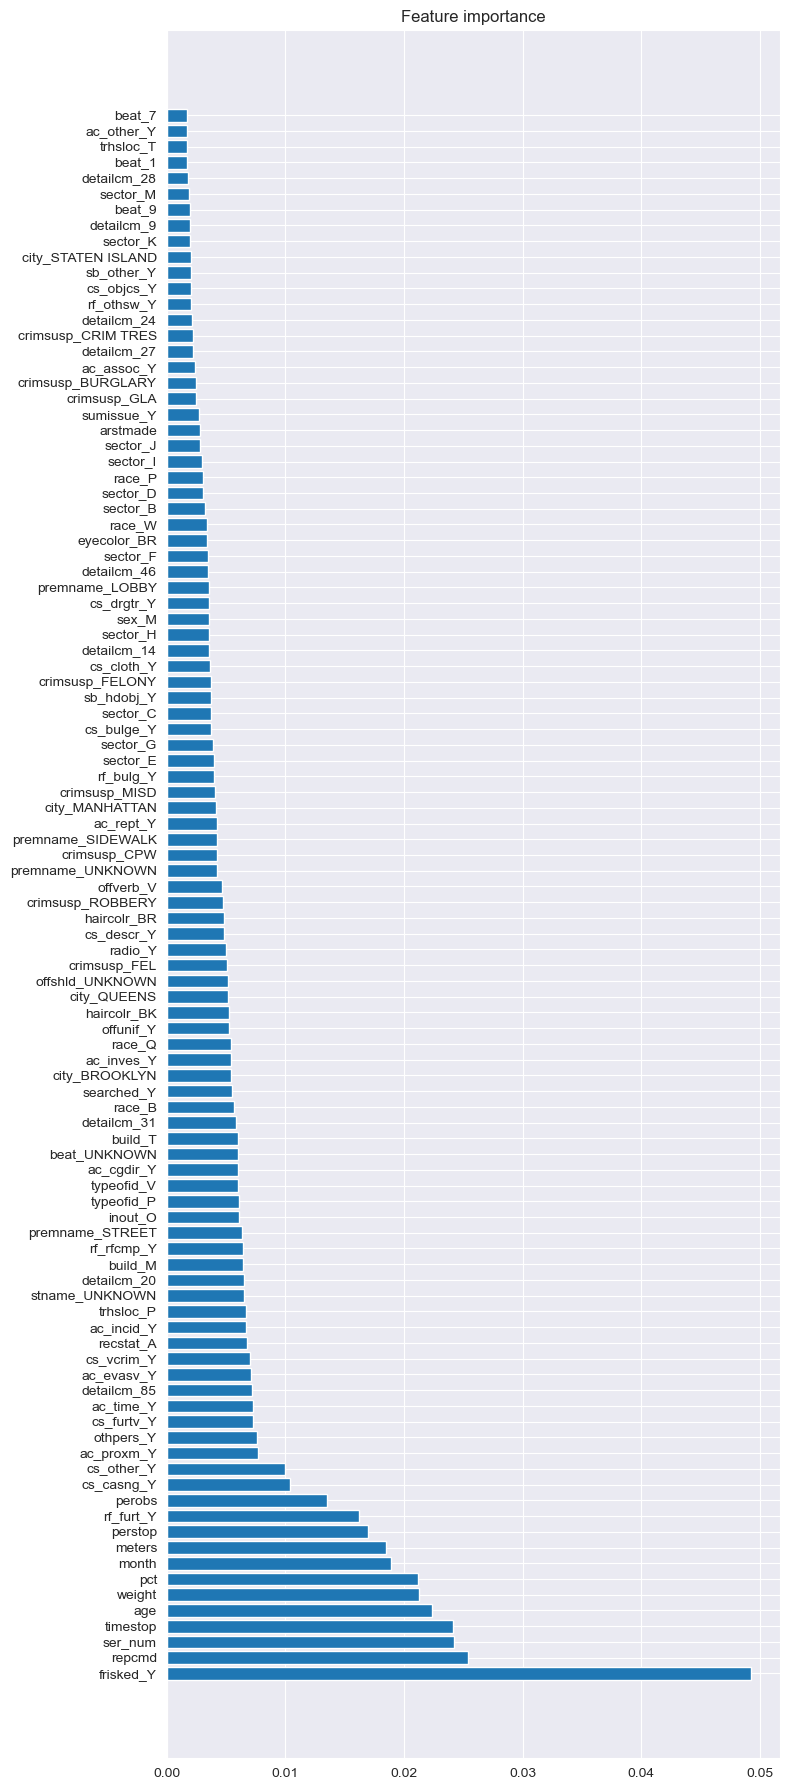

In [121]:
colnames = new_X_train.columns
plt.figure (figsize = (8,18))
plot_importance(new_model_rf, colnames, top_n=100)
plt.tight_layout()

In [122]:
tmp_importance = new_model_rf.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1][:50]
names = [new_X_train.columns[i] for i in sort_importance]
top_50_importance = names[:50]
top_50_importance

['frisked_Y',
 'repcmd',
 'ser_num',
 'timestop',
 'age',
 'weight',
 'pct',
 'month',
 'meters',
 'perstop',
 'rf_furt_Y',
 'perobs',
 'cs_casng_Y',
 'cs_other_Y',
 'ac_proxm_Y',
 'othpers_Y',
 'cs_furtv_Y',
 'ac_time_Y',
 'detailcm_85',
 'ac_evasv_Y',
 'cs_vcrim_Y',
 'recstat_A',
 'ac_incid_Y',
 'trhsloc_P',
 'stname_UNKNOWN',
 'detailcm_20',
 'build_M',
 'rf_rfcmp_Y',
 'premname_STREET',
 'inout_O',
 'typeofid_P',
 'typeofid_V',
 'ac_cgdir_Y',
 'beat_UNKNOWN',
 'build_T',
 'detailcm_31',
 'race_B',
 'searched_Y',
 'city_BROOKLYN',
 'ac_inves_Y',
 'race_Q',
 'offunif_Y',
 'haircolr_BK',
 'city_QUEENS',
 'offshld_UNKNOWN',
 'crimsusp_FEL',
 'radio_Y',
 'cs_descr_Y',
 'haircolr_BR',
 'crimsusp_ROBBERY']

    Se seleccionaron los 50 atributos más importantes y se crearon nuevas matrices de entrenamiento y validación.

In [123]:
new_X_train_50 = new_X_train.loc[:,top_50_importance]
new_X_test_50 = new_X_test.loc[:,top_50_importance]

## Random Forest

### 1era iteración

In [124]:
new_model_rf_v1 = RandomForestClassifier(random_state=42)
new_model_rf_v1.fit (new_X_train_50, new_y_train)

RandomForestClassifier(random_state=42)

In [125]:
yhat_rf_v1 = new_model_rf_v1.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_rf_v1))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      3111
         1.0       0.72      0.76      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 2da iteración

In [126]:
param_grid = {'n_estimators': [100, 200, 300],
            'max_features': [None, 'sqrt', 'log2'],
            'max_depth': [10, 20, 30]
            }

new_model_rf_v2 = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=param_grid, 
                                cv=5, 
                                n_jobs=-1)

new_model_rf_v2.fit(new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [127]:
new_model_rf_v2.best_params_

{'max_depth': 10, 'max_features': None, 'n_estimators': 200}

In [128]:
yhat_rf_v2 = new_model_rf_v2.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_rf_v2))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      3111
         1.0       0.71      0.76      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 3era iteración

In [129]:
param_grid = {'n_estimators': [180, 200, 220],
            'max_features': [None, 'sqrt', 'log2'],
            'max_depth': [1, 5, 10]
            }

new_model_rf_v3 = GridSearchCV(RandomForestClassifier(random_state=42), 
                                param_grid=param_grid, 
                                cv=5, 
                                n_jobs=-1)

new_model_rf_v3.fit (new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [180, 200, 220]})

In [130]:
new_model_rf_v3.best_params_

{'max_depth': 10, 'max_features': None, 'n_estimators': 200}

In [131]:
yhat_rf_v3 = new_model_rf_v3.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_rf_v3))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      3111
         1.0       0.71      0.76      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



## SVM

### 1era iteración

In [132]:
from sklearn.svm import SVC

new_model_svm_v1 = SVC(probability=True, random_state=42)

new_model_svm_v1.fit(new_X_train_50, new_y_train)

SVC(probability=True, random_state=42)

In [133]:
yhat_svm_v1 = new_model_svm_v1.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_svm_v1))

              precision    recall  f1-score   support

         0.0       0.61      0.29      0.39      3111
         1.0       0.51      0.80      0.63      2902

    accuracy                           0.54      6013
   macro avg       0.56      0.55      0.51      6013
weighted avg       0.57      0.54      0.51      6013



    En el reporte de métricas, se observa que el recall para la clase 0 tiene un valor bajo 0.5, lo que indica que su desempeño es peor que un clasificador aleatorio. Debido a esto, el f1-score se ve penalizado al ser este una media armónica entre precision y recall.

### 2da iteración

In [134]:
param_grid = {
        'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'gamma' : [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    }

new_model_svm_v2 = GridSearchCV(SVC(probability=True, random_state=42), 
                                    param_grid=param_grid, 
                                    cv=5, 
                                    n_jobs=-1)

new_model_svm_v2.fit(new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [135]:
new_model_svm_v2.best_params_

{'C': 1000, 'gamma': 1e-07}

In [136]:
yhat_svm_v2 = new_model_svm_v2.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_svm_v2))

              precision    recall  f1-score   support

         0.0       0.59      0.50      0.54      3111
         1.0       0.54      0.62      0.58      2902

    accuracy                           0.56      6013
   macro avg       0.56      0.56      0.56      6013
weighted avg       0.56      0.56      0.56      6013



### 3era iteracion

In [137]:
param_grid = {
        'C' : [15000, 30000, 60000],
        'gamma' : [0.0000001]
    }

new_model_svm_v3 = GridSearchCV(SVC(probability=True, random_state=42), 
                                    param_grid=param_grid, 
                                    cv=5, 
                                    n_jobs=-1)

new_model_svm_v3.fit(new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [15000, 30000, 60000], 'gamma': [1e-07]})

In [138]:
new_model_svm_v3.best_params_

{'C': 60000, 'gamma': 1e-07}

In [139]:
yhat_svm_v3 = new_model_svm_v3.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_svm_v3))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      3111
         1.0       0.68      0.76      0.72      2902

    accuracy                           0.71      6013
   macro avg       0.71      0.71      0.71      6013
weighted avg       0.72      0.71      0.71      6013



# Gradient boosting

### 1era iteración

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

new_model_gb_v1 = GradientBoostingClassifier(random_state=42)

new_model_gb_v1.fit (new_X_train_50, new_y_train)

GradientBoostingClassifier(random_state=42)

In [141]:
yhat_gb_v1 = new_model_gb_v1.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_gb_v1))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 2da iteración

In [142]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

new_model_gb_v2 = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                                param_grid=param_grid, 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

new_model_gb_v2.fit(new_X_train_50, new_y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [143]:
new_model_gb_v2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [144]:
yhat_gb_v2 = new_model_gb_v2.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_gb_v2))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 3era iteración

In [145]:
param_grid = {
    'learning_rate': [0.1, 1, 10],
    'max_depth': [1, 2, 3],
    'n_estimators': [100, 200, 300]
}

new_model_gb_v3 = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                                param_grid=param_grid, 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

new_model_gb_v3.fit(new_X_train_50, new_y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 10], 'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [146]:
new_model_gb_v3.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [147]:
yhat_gb_v3 = new_model_gb_v3.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_gb_v3))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



## Linear Discriminant Analysis

### 1era iteración

In [148]:
new_model_lda_v1 = LinearDiscriminantAnalysis()

new_model_lda_v1.fit(new_X_train_50, new_y_train)

LinearDiscriminantAnalysis()

In [149]:
yhat_lda_v1 = new_model_lda_v1.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_lda_v1))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.73      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 2da iteración

In [150]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'solver': ['svd', 'lsqr', 'eigen'], 
    'tol': [0.00001, 0.0001, 0.001],
    # los demás hiperpárametros arrojan error porque algunas combinaciones no están admitidas.
}

new_model_lda_v2 = GridSearchCV(LinearDiscriminantAnalysis(), 
                                param_grid=param_grid, 
                                cv=5, 
                                n_jobs=-1)

new_model_lda_v2.fit(new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5]],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-05, 0.0001, 0.001]})

In [151]:
new_model_lda_v2.best_params_

{'priors': None, 'solver': 'svd', 'tol': 1e-05}

In [152]:
yhat_lda_v2 = new_model_lda_v2.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_lda_v2))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.73      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



### 3era iteración

In [153]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'solver': ['svd', 'lsqr', 'eigen'], 
    'tol': [0.0000001, 0.000001, 0.00001]
    # los demás hiperpárametros arrojan error porque algunas combinaciones no están admitidas.
}

new_model_lda_v3 = GridSearchCV(LinearDiscriminantAnalysis(), 
                                param_grid=param_grid, 
                                cv=5, 
                                n_jobs=-1)

new_model_lda_v3.fit(new_X_train_50, new_y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5]],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [1e-07, 1e-06, 1e-05]})

In [154]:
new_model_lda_v3.best_params_

{'priors': None, 'solver': 'svd', 'tol': 1e-07}

In [155]:
yhat_lda_v3 = new_model_lda_v3.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_lda_v3))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.73      3111
         1.0       0.71      0.77      0.74      2902

    accuracy                           0.74      6013
   macro avg       0.74      0.74      0.74      6013
weighted avg       0.74      0.74      0.74      6013



## Vooting Classifier

In [156]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models_vc = [
    ("Logistic Regression", LogisticRegression(max_iter=10000, random_state=42)),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ]


### 1era iteracion

In [157]:
new_model_vc_v1 = VotingClassifier(estimators=models_vc,
                                    voting='soft',
                                    n_jobs=-1).fit(new_X_train_50, new_y_train)


In [158]:
yhat_vc_v1 = new_model_vc_v1.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_vc_v1))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      3111
         1.0       0.69      0.76      0.72      2902

    accuracy                           0.72      6013
   macro avg       0.72      0.72      0.72      6013
weighted avg       0.72      0.72      0.72      6013



### 2da iteración

In [159]:
#ensemble_precision
new_model_vc_v2 = VotingClassifier(estimators=models_vc,
                                    voting='soft',
                                    weights=[0.5, 0.25, 0.25]
                                    ).fit(new_X_train_50, new_y_train)

In [160]:
yhat_vc_v2 = new_model_vc_v2.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_vc_v2))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      3111
         1.0       0.70      0.75      0.73      2902

    accuracy                           0.73      6013
   macro avg       0.73      0.73      0.73      6013
weighted avg       0.73      0.73      0.73      6013



## 3era iteracion

In [161]:
#ensemble_recall
new_model_vc_v3 = VotingClassifier(estimators=models_vc,
                                    voting='soft',
                                    weights=[0.25, 0.25, 0.5]
                                    ).fit(new_X_train_50, new_y_train)

In [162]:
yhat_vc_v3 = new_model_vc_v3.predict(new_X_test_50)
print(classification_report(new_y_test, yhat_vc_v3))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70      3111
         1.0       0.67      0.75      0.71      2902

    accuracy                           0.70      6013
   macro avg       0.71      0.71      0.70      6013
weighted avg       0.71      0.70      0.70      6013



In [169]:
def print_roc_auc_v2(model1, model2, model3, model4, model5, X_test):
    """
    Imprime en un solo gráfico las curvas ROC (test) y los valores AUC (test) para los modelos.

    Parameters
    ----------
    model1: variable
            modelo ajustado de Random Forest
    model2: variable
            modelo ajustado de Support Vector Machine
    model3: variable
            modelo ajustado de Gradient Boosting
    model4: variable
            modelo ajustado de Linear Discriminant Analysis
    model5: variable:
            modelo ajustado de Voting CLassifier
    X_test: variable
            matriz de datos de validación

    Return
        None
    """
    # Valores de probabilidad para cada modelo
    models = [model1, model2, model3, model4, model5]
    y_hats = [model.predict_proba(X_test)[:, 1] for model in models]

    model_names = ['Random Forest', 'Support Vector Machine', 'Gradient Boosting', 'Linear Discriminant Analysis', 'Voting Classifier'] 
    fprs, tprs, labels, auc_scores = [], [], [], []

    for i, y_hat in enumerate(y_hats):
        fpr, tpr, _ = roc_curve(y_test, y_hat)
        fprs.append(fpr)
        tprs.append(tpr)
        labels.append(model_names[i])
        auc_scores.append(round(roc_auc_score(y_test, y_hat), 4))

    # Curvas ROC de cada modelo
    plt.figure(figsize=(10, 8))
    for i in range(len(models)):
        plt.plot(fprs[i], tprs[i], lw=1, label=f"{labels[i]} (AUC={auc_scores[i]})")
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=2), plt.plot([1, 1] , c='limegreen', lw=2)
    plt.xlabel('Falsos Positivos', fontsize=11)
    plt.ylabel('Verdaderos Positivos', fontsize=11)
    plt.title('Curvas ROC de modelos')
    plt.legend()
    plt.show()

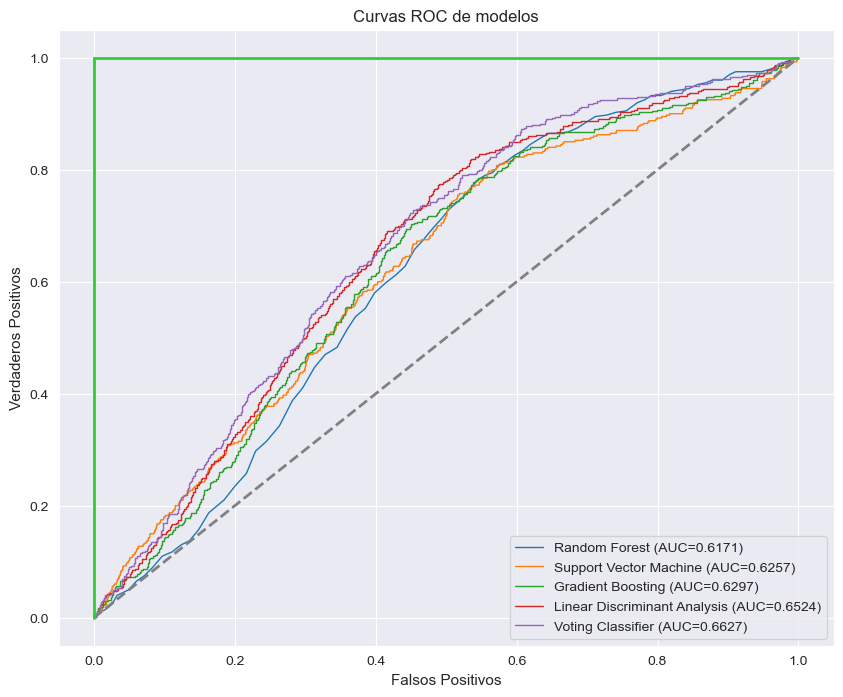

In [170]:
print_roc_auc_v2(model1=new_model_rf_v1, model2=new_model_svm_v3, model3=new_model_gb_v1, model4=new_model_lda_v1, model5=new_model_vc_v2, X_test=new_X_test_50)

    - Se entrenaron cinco modelos predictivos para predecir si el procedimiento policial concluirá en alguna acción violenta. Estos modelos son Random Forest, Support Vector Machine, Gradient Boosting, Linear Discriminant Analysis y Voting Classifier. 
    - Para Voting Classifier el comité de votación consideró los modelos Logistic Regression, LDA y QDA.
    - Para los cinco modelos se realizaron tres iteraciones, en donde se obtuvieron todas las métricas superiores a un clasificador aleatorio.
    - Las iteraciones 2 y 3 consistieron en aplicar una búsqueda de grilla.
    - De estos cinco tipos de modelos, los dos mejores fueron Random Forest y Gradient Boosting, ambos en su primera iteración.

## <span style="color:orange"> Mejores 2 modelos

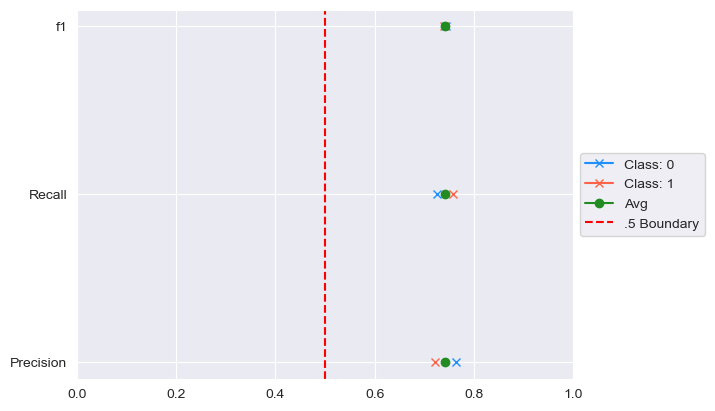

In [176]:
# Random Forest v1
plot_classification_report(new_y_test, yhat_rf_v1)

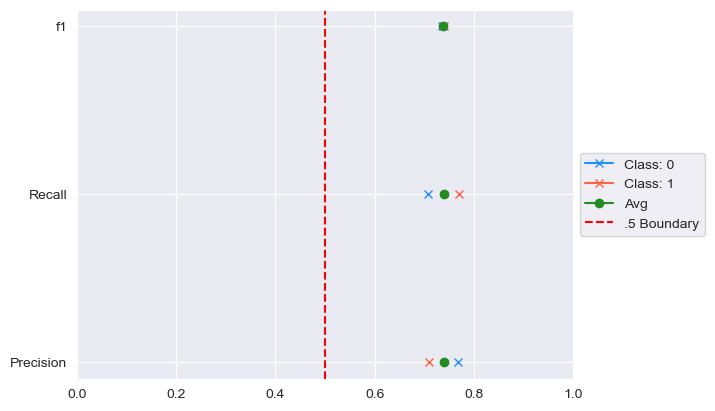

In [177]:
# Gradient Boosting v1
plot_classification_report(new_y_test, yhat_gb_v1)

    Se observó en algunos modelos un incremento sustancial de rendimiento entre la primera iteración y la segunda.
    El caso más notorio fue en SVM, en donde la primera iteración arrojó métricas pobres, y luego en la segunda mejoró bastante y en la tercera iteración volvió a mejorar. 
    
    Para esta base de datos, todos los modelos implementados presentaron un rendimiento mejor que un clasificador aleatorio en todas sus métricas, a excepción de SVM en su primera iteración.

    Respecto a los datos, estos podrían mejorar en como se registran, ya que se encontraron variables distintas que explican información similar, y otros casos en donde no existía información o esta era irrelevante.

## <span style="color:orange"> Archivo serializado

In [178]:
# import pickle
pickle.dump((# top 2, modelos ajustados
            new_model_rf_v1,
            new_model_gb_v1),
            open('rodrigo_sepulveda_modelos_pregunta_4.sav', 'wb'))